# Regresión lineal con python

La regresión lineal es un modelo matemático estadístico que nos ayuda a explicar la relación lineal entre dos variables. En concreto, ayuda a explicar una variable dependiente a partir de una o más variables independientes. La regresión lineal es conveniente para aquellas aplicaciones donde exista una tendencia lineal. Uno de los ejemplos más comunes es utilizar una regresión lineal para explicar la variación del precio de una vivienda.

Veamos un ejemplo práctico de aplicación.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression

In [10]:
df = pd.read_csv('./pesos.csv', encoding='latin1')
columns = ['BW', 'BPD', 'AD', 'Sex', 'Ge', 'Sm']
df = df[columns]

In [11]:
df.head()

,BW,BPD,AD,Sex,Ge,Sm
0,2200.0,82,90,M,33,N
1,4100.0,97,129,M,43,N
2,4200.0,97,133,F,43,N
3,1300.0,74,71,M,33,S
4,1150.0,68,80,F,33,S


El conjunto de datos contiene registros de bebes recién nacidos. Por un lado, tenemos algunas variables cuantitativas como la variable BW contiene el peso de los bebés en gramos, las semanas de gestación, la variable BPD representa el diámtetro biparietal, la variable AD el diámetro abdominal, estos dos medidos justo antes del nacimiento del bebé. Por otro lado, tenemos algunas variables cualitativas, y en este caso dictonómicas, que son el Sexo (Sex) y un indicador de sí o no que respone a la pregunta si la madre ha fumado durante el embarazo.

El diámetro biparietal se define como la distancia que existe entre los dos huesos parietales del cráneo del feto.
El diámetro abdominal se define como la distancia alrededor del abdomen en un punto específico.

Estas dos medidas mencionadas anteriormente, entre otras, se utilizan para controlar el peso del bebé durante el embarazo con la ayuda de ecografias.

El conjunto de datos tiene como objetivo responder a la pregunta, 'es influyente para el peso del bebé que la madre sea fumadora o no?'. Además, me voy a detener a analizar como el diámetro biparietal y abdominal son útiles para 'predecir' el peso de los bebés.

## Relación entre las variables

Como he mencionado anteriormente, para obtener una buena regresión lineal es necesario que las variables presente una correlación y un dependencia lineal entre ellas. Una buena técnica para comprobarlo de forma visual es presentando las dos variables mediante un diagrama de dispersión. Para ello, vamos a analizar en primer lugar la relación de las variables AD-BW y BPD-BW.

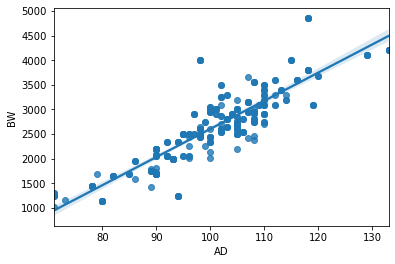

In [12]:
%matplotlib inline
sns.regplot(x='AD', y='BW', data=df)

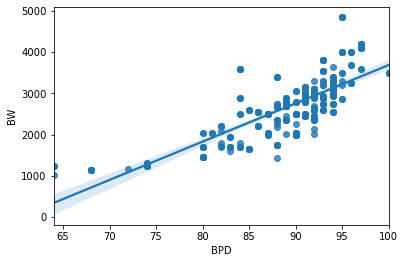

In [13]:
sns.regplot(x='BPD', y='BW', data=df)

Se observa una dependencia lineal entre las variables AD y BW. En cambio, las variables BPD y BW no tienen una tendencia tan lineal.

In [14]:
# calculamos el coeficiente de correlación entre las variables AD y BW
np.corrcoef(df['AD'], df['BW'])[0, 1]

0.8752187429636613

In [15]:
# calculamos el coeficiente de correlación entre las variables BPD y BW
np.corrcoef(df['AD'], df['BPD'])[0, 1]

0.7357069667872455

Como era de esperar, las variables AD y BW presentan mayor correlación.

## Regresión lineal simple

La regresión lineal simple se define con la siguiente fórmula $y = \beta_0 + \beta_1x + \epsilon$, donde $\beta_0$ y $\beta_1$ son los parámetros del modelo. $\epsilon$ representa el error que explica la variabilidad que no se puede explicar con la relación lineal de x e y. El error se considera una variable aleatoria independiente distribuida de forma normal, con media 0 y desviación estándar $\sigma$.

La librería `scikit learn` implementa una clase llamada `LinearRegression()` que nos ayuda a generar y paramétrizar el modelo. Por otro lado, la librería `statsmodels` también nos permite generar un modelo de regresión lineal. La diferencia entre ambas librerías es la cantidad de información que estos nos ofrecen. Veamos un ejemplo con cada uno de ellos.

In [16]:
# generamos los valores x e y, donde x es AD y y el BW (variable a predecir)
x = np.array(df['AD']).reshape((-1, 1))  # es necesario aplicar el reshape
y = np.array(df['BW'])

# generamos dos set de datos, uno de entrenamiento (80 %) y uno de test (20 %) para
# analizar posteriormente el porcentaje de acierto del modelo.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)

In [17]:
linear_regression_model = LinearRegression()
# generamos el modelo con el set de entrenamiento
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [18]:
r_square = linear_regression_model.score(X_train, y_train)
intercept = linear_regression_model.intercept_
slope = linear_regression_model.coef_
print(f'El coeficiente de determinación es de: {r_square}')
print(f'Intercepto: {intercept}')
print(f'Pendiente: {slope}')

El coeficiente de determinación es de: 0.7558871557851403
Intercepto: -3228.1661945005503
Pendiente: [58.36298958]


El coeficiente de determinación es una medida que determina el ajusto del modelo. Dicho coeficiente puede tomar valores entre 0 y 1, conta más cerca de 1 mayor ajustado estará el modelo. Por otro lado, el intercepto y la pendiente son los parámetros del modelo tal que $y = -3228.17 + 58.36 \beta$, donde $ \beta $ representa en este caso la variable AD. Por cada unidad de AD, aumentamos 58.36 unidades de peso.

En el caso de que no necesitemos realizar un análisis más profundo de la regresión lienal podríamos obtener los parámetros del modelo y utilizarlo. Nosotros vamos a seguir analizando más en profundidad el modelo de regresión lineal simple. Para ello, utilizamos el librería `statsmodels`. Una vez generado el modelo, la función `summary()` proporciona un resumen estadístico del modelo bastante completo.

In [32]:
import statsmodels.api as sm

# añadimos la variable a predecir al modelo 
x = sm.add_constant(x)
# generamos y entrenamos el modelo
linear_model = sm.OLS(y, x)
results = linear_model.fit()


results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     975.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           5.41e-96
Time:                        14:48:10   Log-Likelihood:                -2197.7
No. Observations:                 300   AIC:                             4399.
Df Residuals:                     298   BIC:                             4407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3105.7283    185.848    -16.711      0.000   -3471.469   -2739.988
x1            57.1131      1.829     31.234      0.000      53.515      60.712
==============================================================================
Omnibus:                       78.435   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              259.465
Skew:                           1.116   Prob(JB):                     4.55e-57
Kurtosis:                       6.971   Cond. No.                         887.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

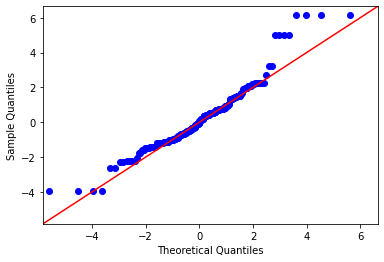

In [20]:
import scipy.stats as stats

residuals = linear_model.fit().resid
# fig = sm.qqplot(residuals, stats.t, fit=True, line='45')
# plt.show()

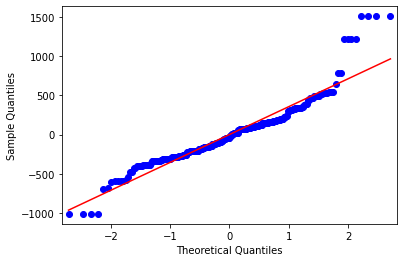

In [31]:
fig = sm.qqplot(residuals, line='r')

### Predicción

Procedemos a realizar la predicción con nuestro set para medir el acierto del algoritmo.

In [21]:
y_predicted = linear_regression_model.predict(X_test)

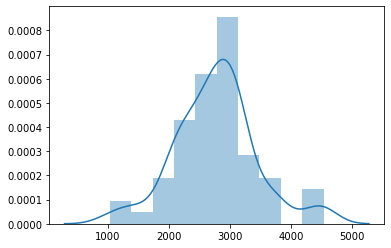

In [22]:
sns.distplot(y_predicted)

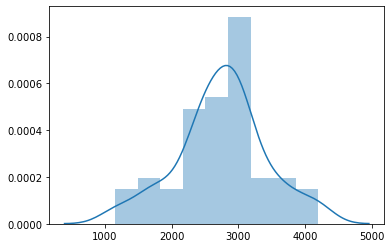

In [23]:
sns.distplot(y_test)

In [24]:
print(np.std(y_test))
print(np.mean(y_test))
print(np.std(y_predicted))
print(np.mean(y_predicted))

664.7528479735073
2748.866666666667
674.5801152212797
2767.6582686625193


In [30]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(y_test, y_predicted)
mean_squared_error(y_test, y_predicted)

82167.75239521688

In [25]:
import statsmodels.api as sm
x = sm.add_constant(x)
linear_model = sm.OLS(y, x)
results = linear_model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     975.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):           5.41e-96
Time:                        13:51:28   Log-Likelihood:                -2197.7
No. Observations:                 300   AIC:                             4399.
Df Residuals:                     298   BIC:                             4407.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3105.7283    185.848    -16.711      0.0

Cogiendo la información de la página https://realpython.com/linear-regression-in-python/